# Example Visualize Filters and Feature Maps in Convolutional Neural Networks

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [9]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 conv1_pad (None, 230, 230, 3)
2 conv1_conv (None, 112, 112, 64)
3 conv1_bn (None, 112, 112, 64)
4 conv1_relu (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
8 conv2_block1_1_bn (None, 56, 56, 64)
9 conv2_block1_1_relu (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
11 conv2_block1_2_bn (None, 56, 56, 64)
12 conv2_block1_2_relu (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
15 conv2_block1_0_bn (None, 56, 56, 256)
16 conv2_block1_3_bn (None, 56, 56, 256)
17 conv2_block1_add (None, 56, 56, 256)
18 conv2_block1_out (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
20 conv2_block2_1_bn (None, 56, 56, 64)
21 conv2_block2_1_relu (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
23 conv2_block2_2_bn (None, 56, 56, 64)
24 conv2_block2_2_relu (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
26 conv2_block2_3_bn (None, 56, 56, 256)
27 conv2_block2_add (None, 56, 56, 256)
28 

In [10]:
slt = [4, 18, 28, 38, 50, 60, 70, 80, 92, 102, 112, 122, 132, 142, 154, 164, 173]

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv1_conv (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 64)     256       
 n)                                                              
                                                                 
 conv1_relu (Activation)     (None, 112, 112, 64)      0         
                                                                 
Total params: 9,728
Trainable params: 9,600
Non-trainable params: 128
_______________________________________________________

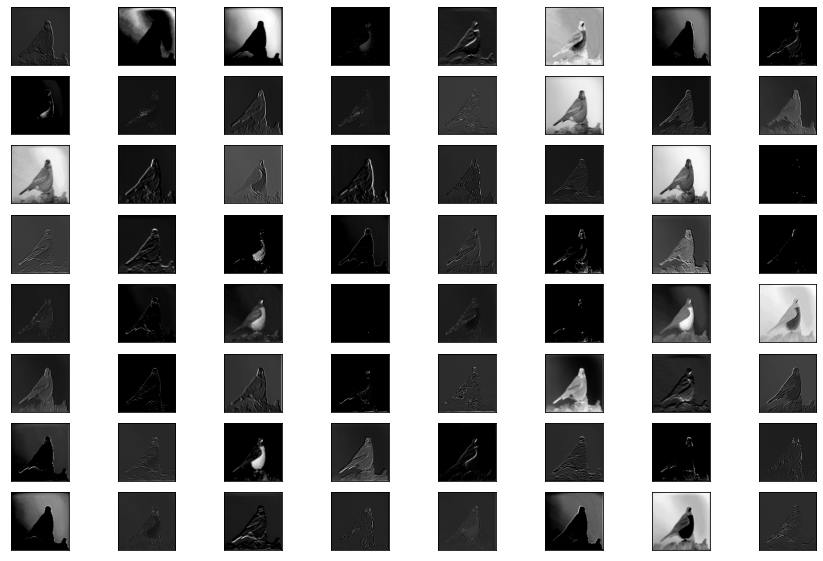

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

def display(feature_image):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_"
    # plt.savefig(filename+"nam.png")
    plt.show()

def main():
    model = ResNet50()
    model = Model(inputs=model.inputs, outputs=model.layers[4].output)
    model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    feature_map = model.predict(img)
    display(feature_map)
if __name__ == "__main__":
    main()

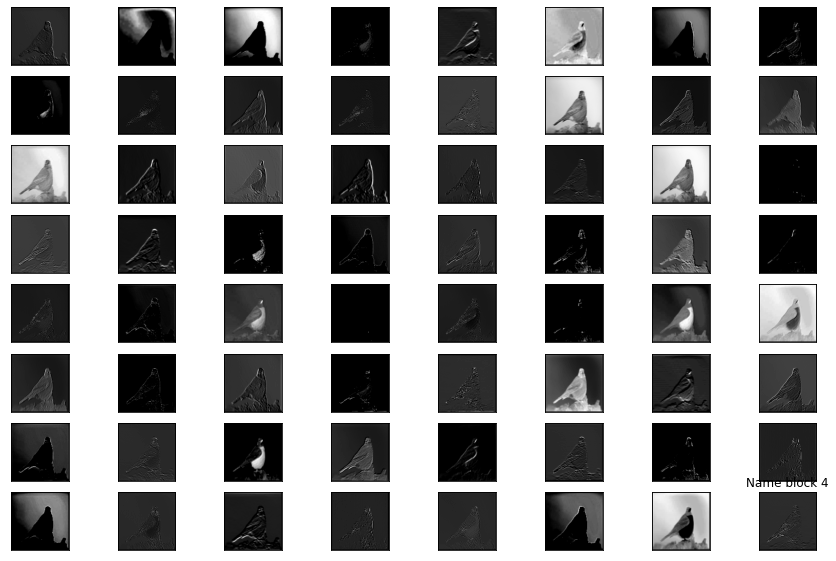

Anh so 4


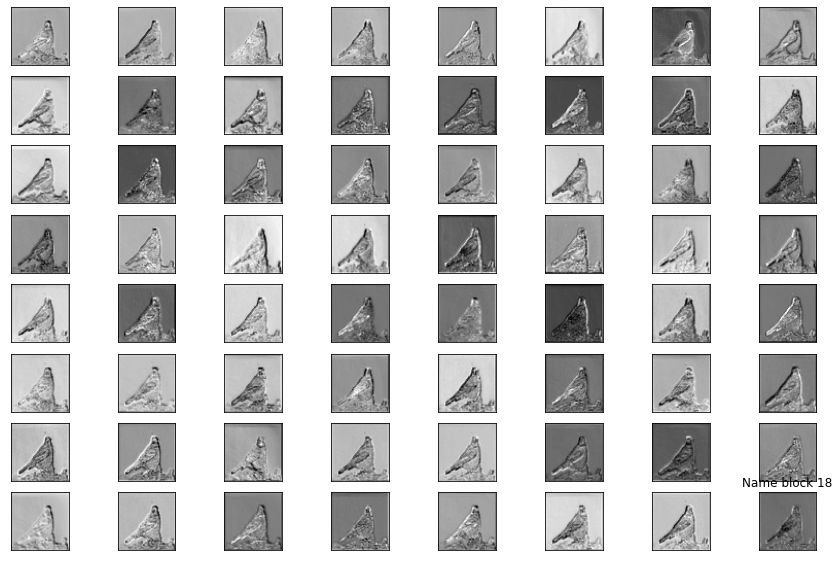

Anh so 18


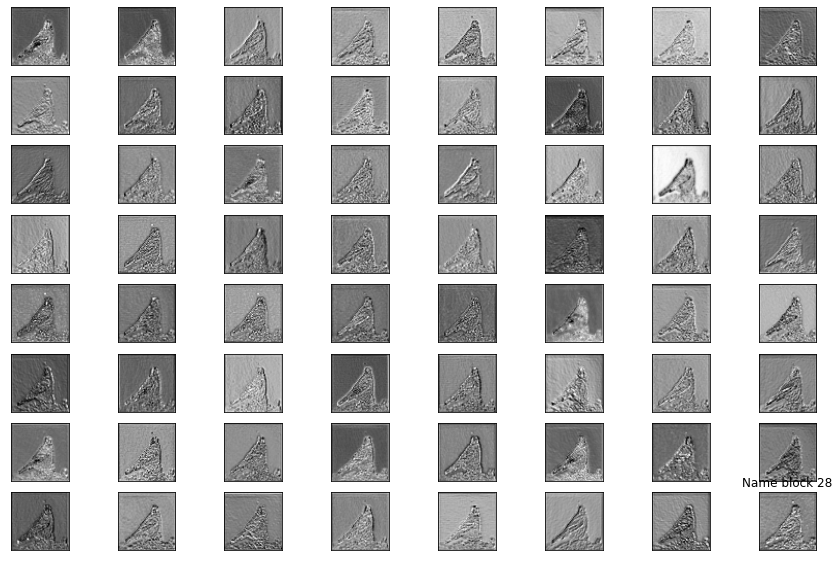

Anh so 28


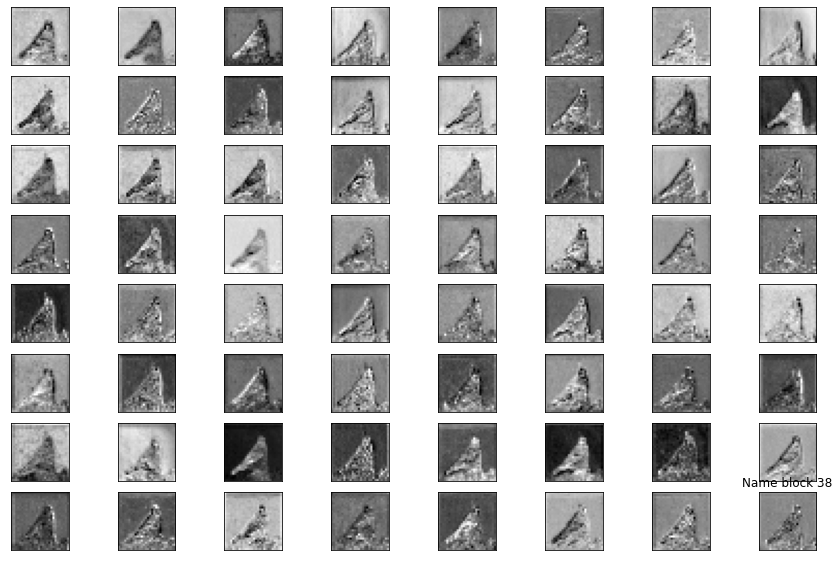

Anh so 38


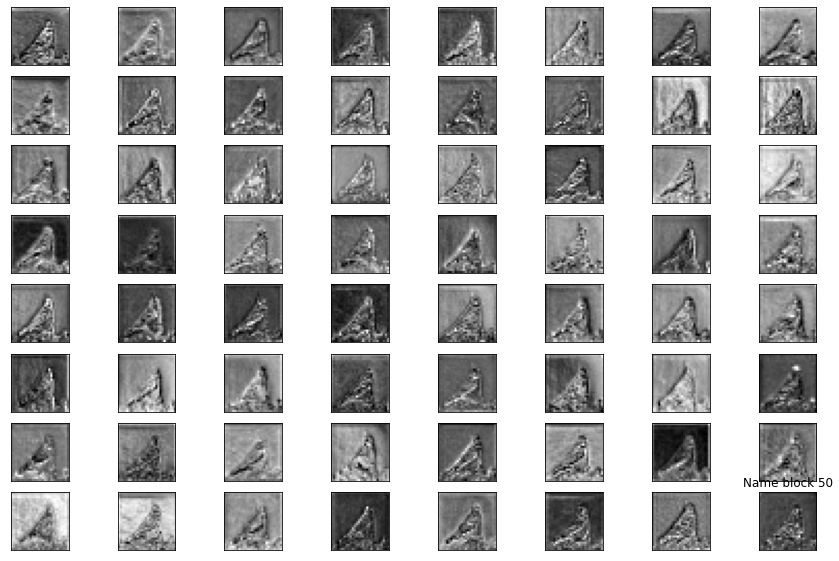

Anh so 50


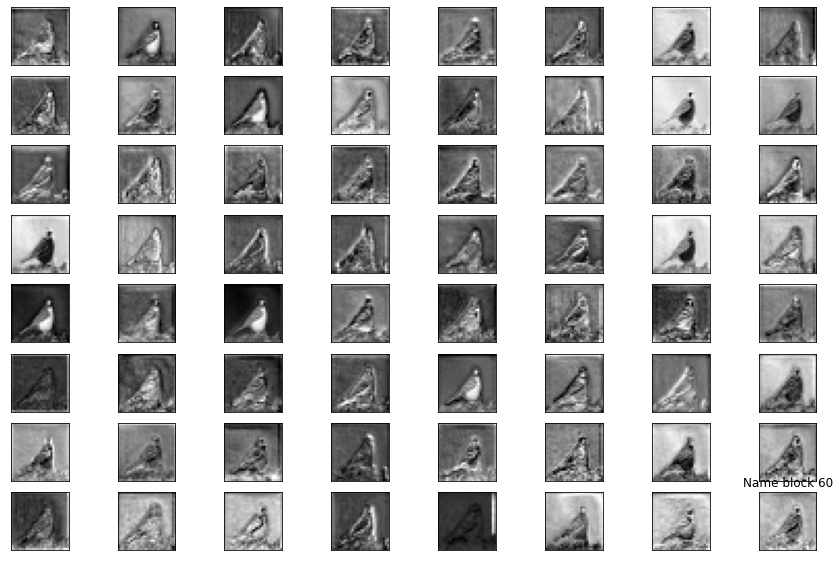

Anh so 60


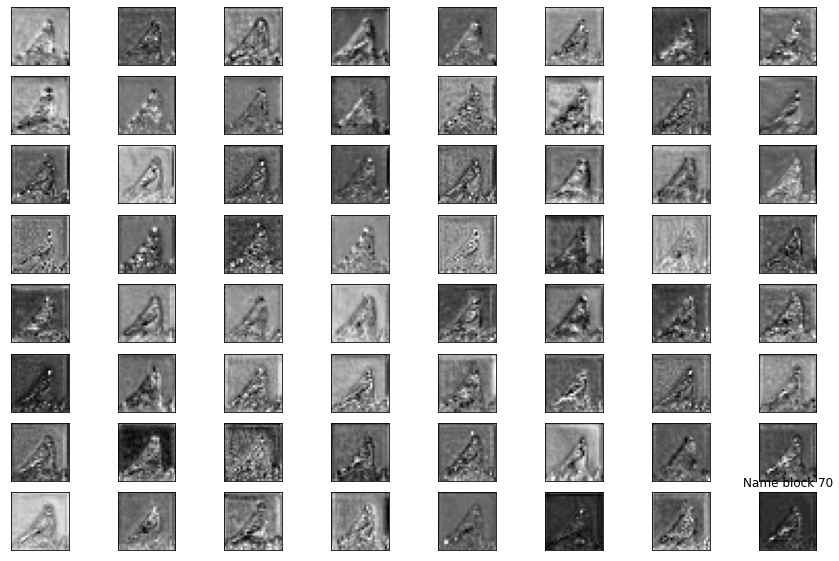

Anh so 70


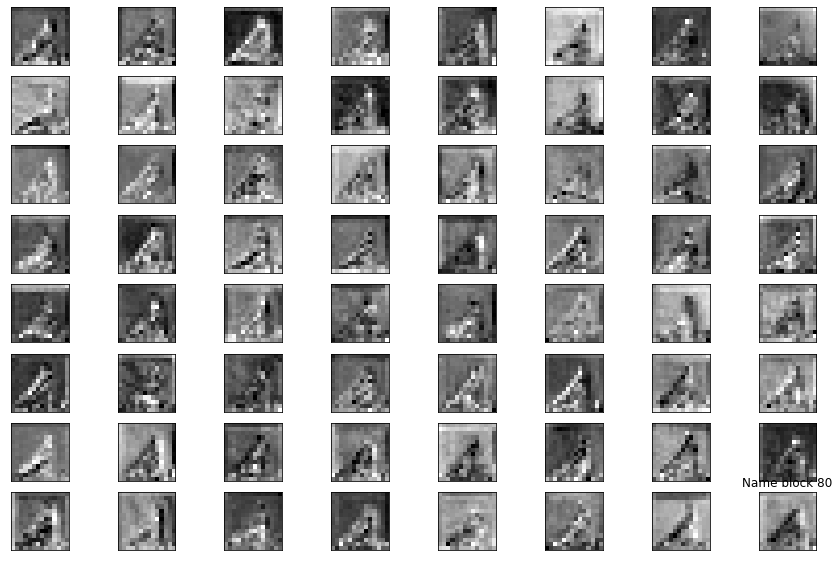

Anh so 80


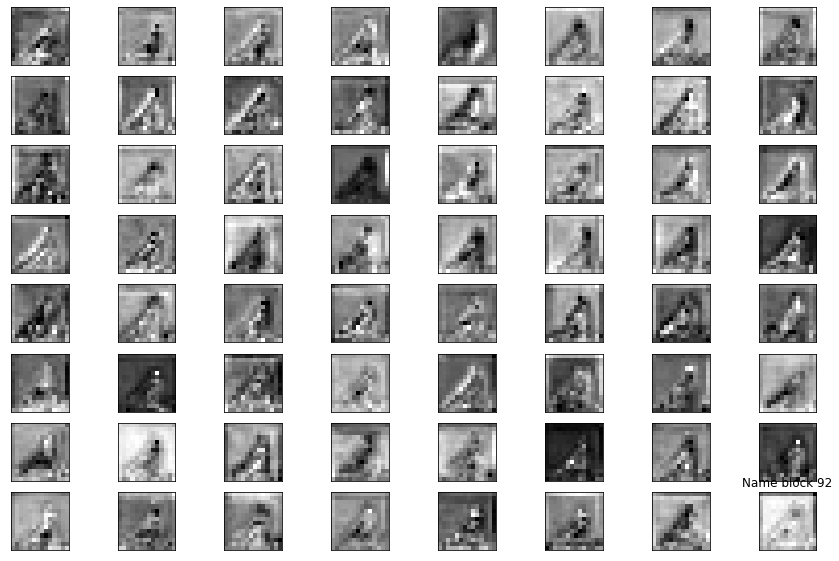

Anh so 92


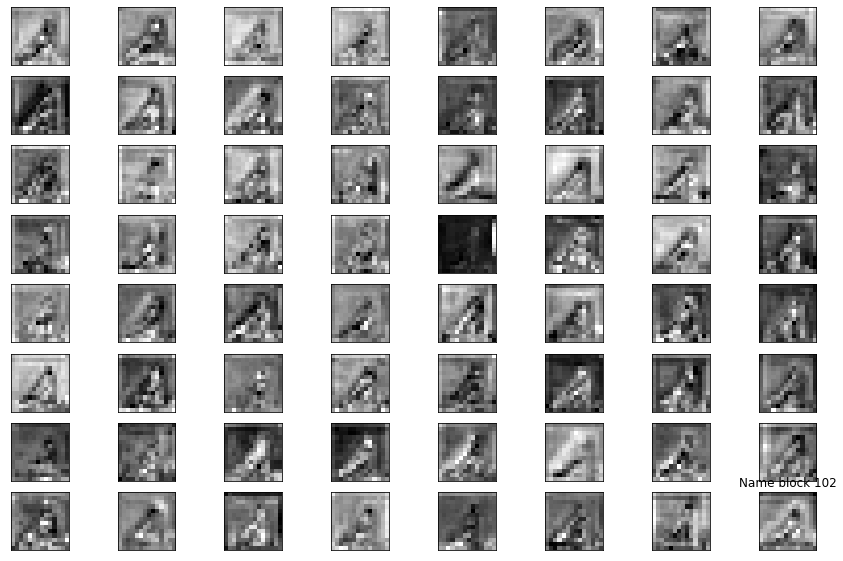

Anh so 102


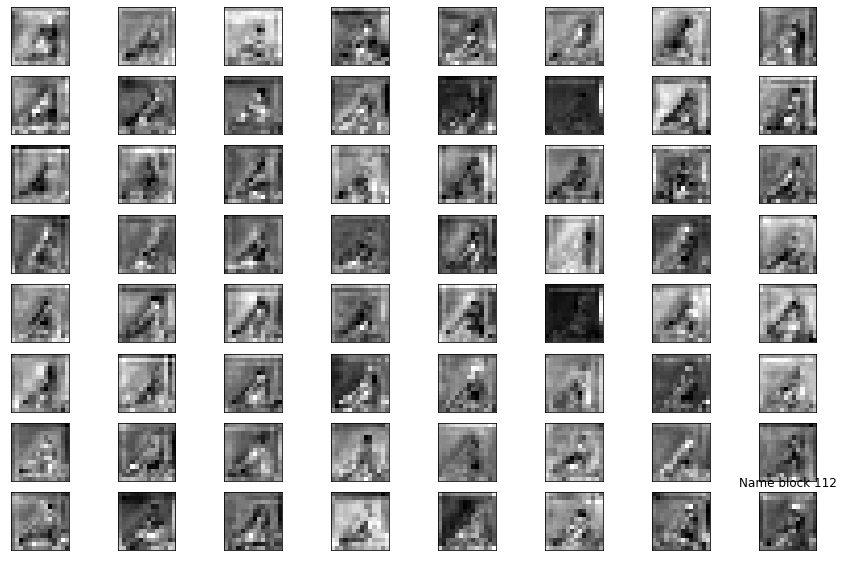

Anh so 112


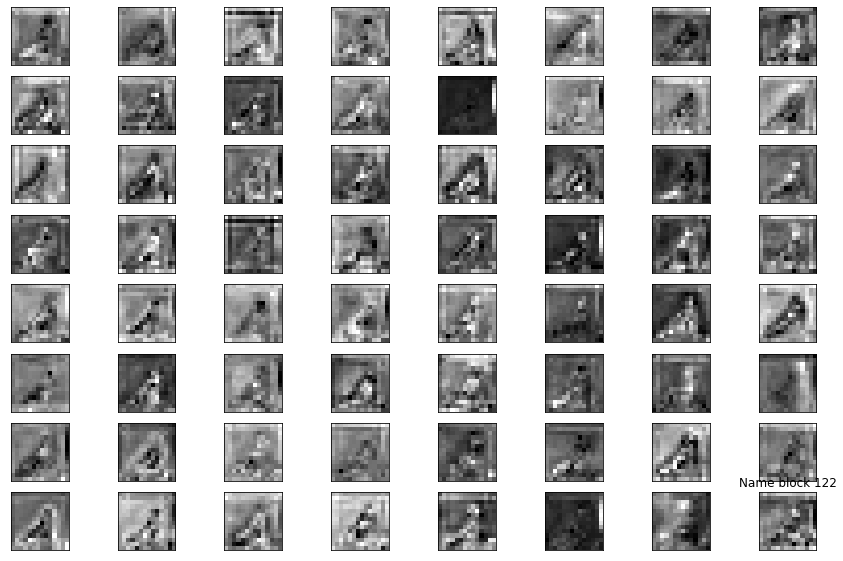

Anh so 122


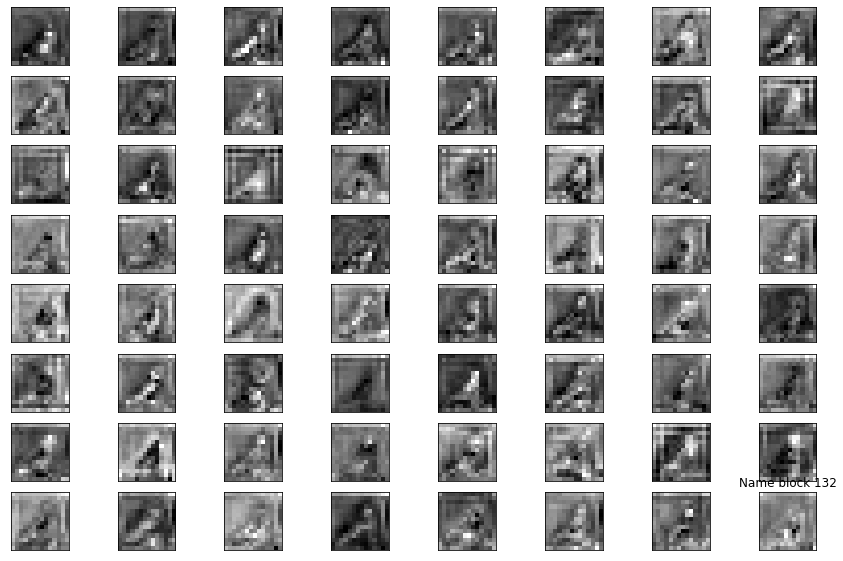

Anh so 132


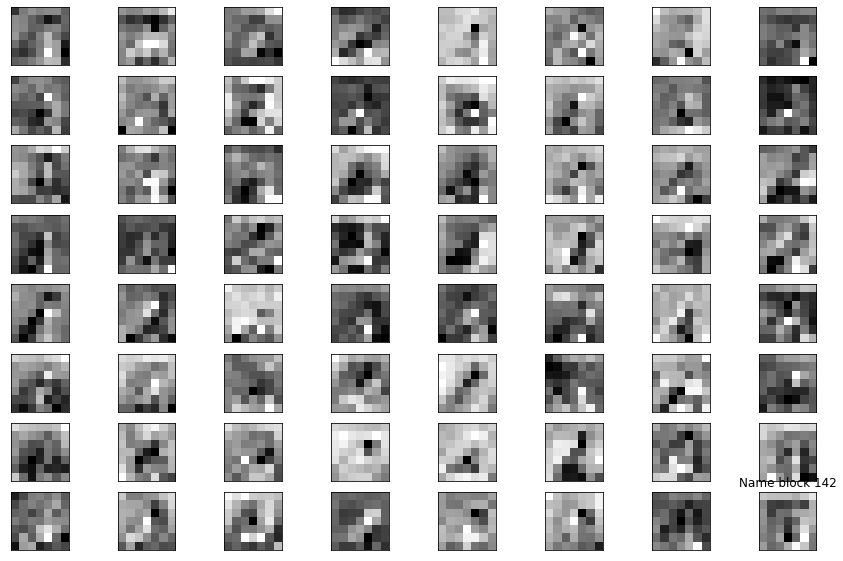

Anh so 142


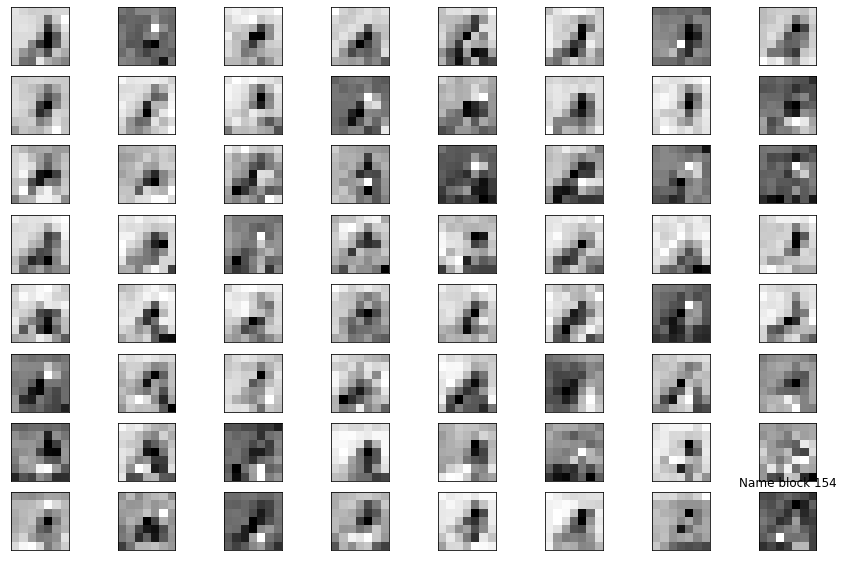

Anh so 154


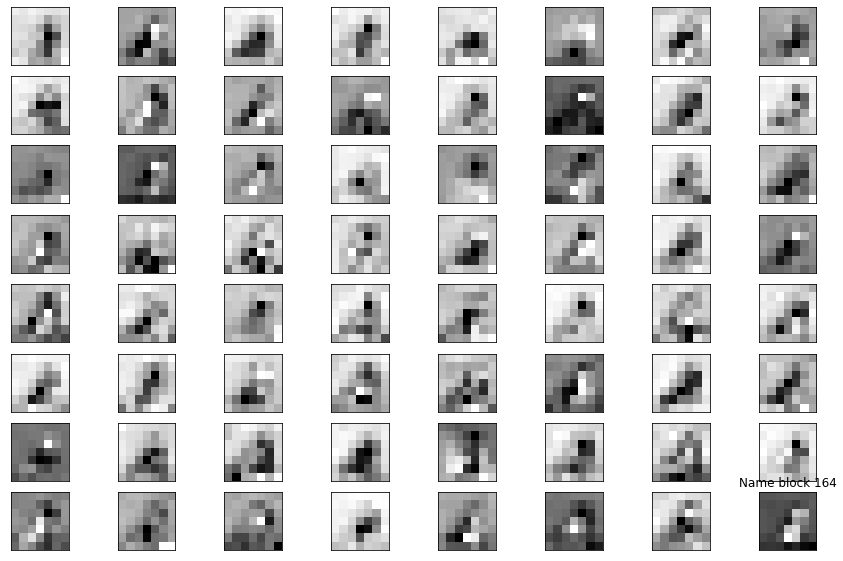

Anh so 164


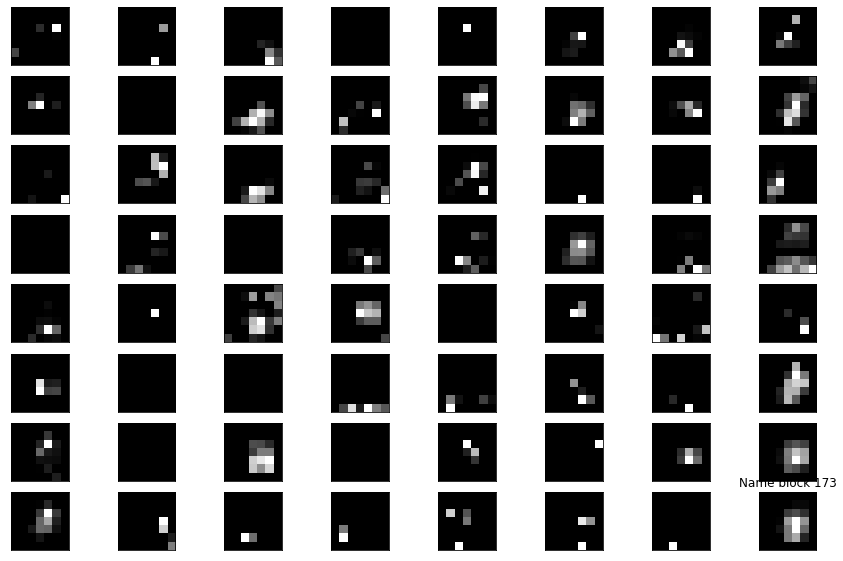

Anh so 173


In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt 

def display(feature_image, name_file):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_{}_".format(name_file)
    # plt.savefig(filename+"nam.png")
    plt.title("Name block {}".format(name_file))
    plt.show()

def main():
    model = ResNet50()
    ixs = slt
    outputs = [model.layers[i+1].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    fe_map = model.predict(img)
    its = 0
    for feature_map in fe_map:
        display(feature_map, ixs[its])
        print("Anh so {}".format(ixs[its]))
        its += 1
if __name__ == "__main__":
    main()